In [1]:
import sys                                                                           
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import numpy as np
import matplotlib.pyplot as plt
import fileread as fr
import predefined as pd
import wave_ops as wo
import pFilter

In [2]:
bd,ch = 4,3 ###64E
data=fr.raw('/home/noah/Desktop/large_analysis/ca_analysis/Run_131_0.bin',length=3500,\
                   row=1000,numwaves=100000)
wo.baseline_restore(data,600)
waves=pd.single_pixel(data,bd,ch)
waves=waves['wave']
del data

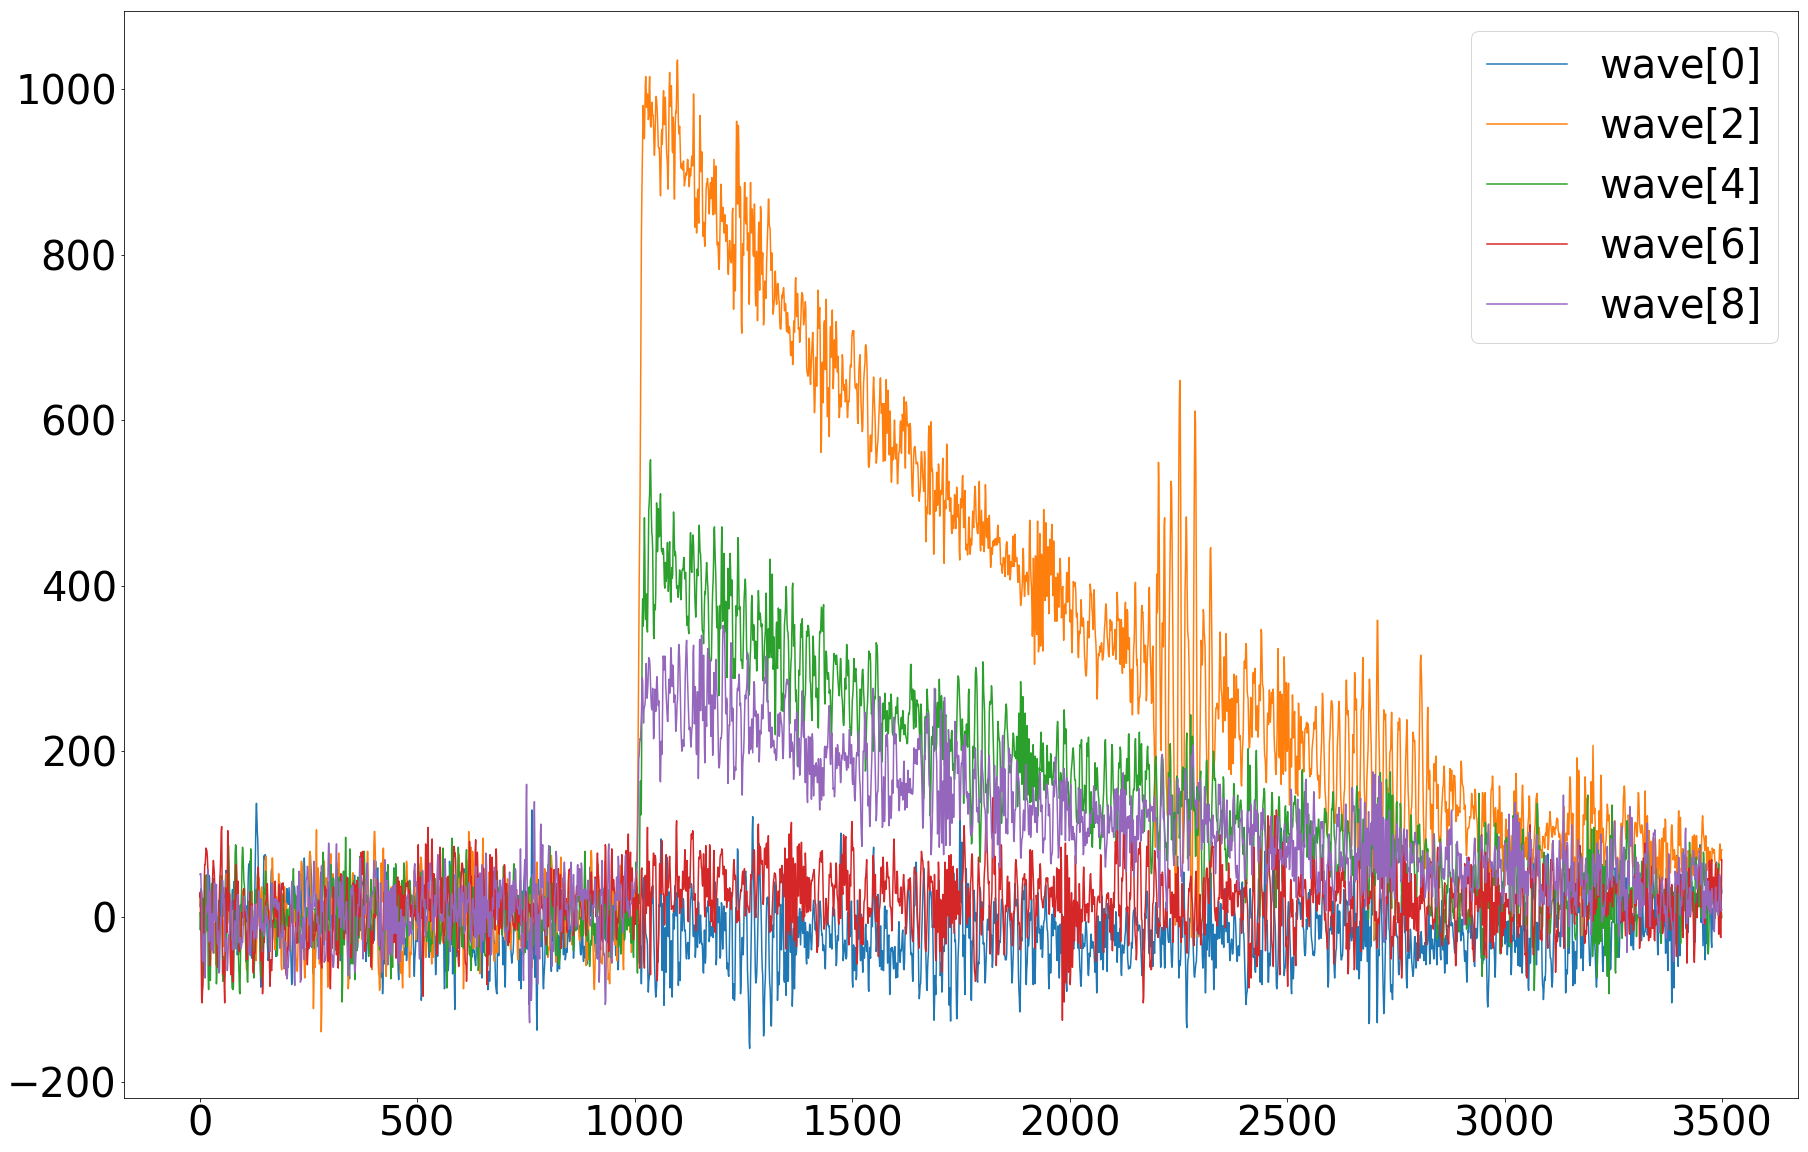

In [3]:
fs=40
t=np.arange(3500)
plt.figure(figsize=(30,20))
for i in range(0,10,2):
    plt.plot(t,waves[i],label='wave[{index:0d}]'.format(index=i))
plt.tick_params(labelsize=fs)
plt.legend(fontsize = fs)
plt.show()

In [4]:
x=np.zeros((len(waves),3))
for i in range(len(waves)):
    x[i]=pFilter.execute(waves[i].astype('int'),1050.)
print x[0:10]

tots=np.array((np.sum(x[:,0]),np.sum(x[:,1]),np.sum(x[:,2])))
print tots, len(waves)

[[ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  1.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]
 [ 1.  1.  0.]]
[ 29198.  29245.   1822.] 29403


So basically, the first two filters are flagging almost every event, whereas the 3'rd only flags like 6$\%$